# Advanced Analytics

## **1. Coleta dos dados**

### **1.1. Instalação e importação das bibliotecas**

In [2]:
!pip install mlforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [3]:
!pip install hierarchicalforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.4/548.4 kB 13.3 MB/s eta 0:00:00


In [4]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.8 MB/s eta 0:00:00


In [5]:
# Bibliotecas padrão
import os
import requests

# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsforecast
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from mlforecast import MLForecast
from mlforecast.utils import PredictionIntervals
from hierarchicalforecast.evaluation import evaluate
from utilsforecast.losses import rmse

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive
import pandas as pd


pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### **1.2. Carregamento dos dados**

In [6]:
df = pd.read_csv("vendas.csv")
df.head()

,customerid,businessentityid,store_name,salesorderid,onlineorderflag,salesorderdetailid,orderqty,unitprice,category_name,orderdate,unitpricediscount,productid,product_name,stateprovincecode,state_name,country_name,totaldue
0,11012,NaN,NaN,68413,True,99734,1,2.29,Accessories,2014-03-17,0.00,873,Patch Kit/8 Patches,WA,Washington,United States,6.94
1,11012,NaN,NaN,68413,True,99733,1,3.99,Accessories,2014-03-17,0.00,922,Road Tire Tube,WA,Washington,United States,6.94
2,11012,NaN,NaN,54508,True,52646,1,4.99,Accessories,2013-08-16,0.00,921,Mountain Tire Tube,WA,Washington,United States,82.85
3,11012,NaN,NaN,54508,True,52645,1,35.00,Accessories,2013-08-16,0.00,930,HL Mountain Tire,WA,Washington,United States,82.85
4,11012,NaN,NaN,54508,True,52647,1,34.99,Accessories,2013-08-16,0.00,708,"Sport-100 Helmet, Black",WA,Washington,United States,82.85


## **2. Transformação dos dados**


### **2.1. Dados nulos**



É possivel ver que as colunas businessentityid e store_name tem a mesma quantidade de valores nulos.

In [7]:
df.isnull().sum()

,0
customerid,0
businessentityid,60398
store_name,60398
salesorderid,0
onlineorderflag,0
salesorderdetailid,0
orderqty,0
unitprice,0
category_name,0
orderdate,0


In [8]:
condicao = df[df['store_name'].isnull()]['onlineorderflag'] == True
todas_verdadeiras = condicao.all()

if todas_verdadeiras:
    print("Todas as lojas com store_names nulo têm onlineorderflag = True.")
else:
    print("Alguma loja com store_names nulo não tem onlineorderflag = True.")

Todas as lojas com store_names nulo têm onlineorderflag = True.


In [9]:
df['store_name'].fillna('e-commerce', inplace=True)
df.head()

,customerid,businessentityid,store_name,salesorderid,onlineorderflag,salesorderdetailid,orderqty,unitprice,category_name,orderdate,unitpricediscount,productid,product_name,stateprovincecode,state_name,country_name,totaldue
0,11012,NaN,e-commerce,68413,True,99734,1,2.29,Accessories,2014-03-17,0.00,873,Patch Kit/8 Patches,WA,Washington,United States,6.94
1,11012,NaN,e-commerce,68413,True,99733,1,3.99,Accessories,2014-03-17,0.00,922,Road Tire Tube,WA,Washington,United States,6.94
2,11012,NaN,e-commerce,54508,True,52646,1,4.99,Accessories,2013-08-16,0.00,921,Mountain Tire Tube,WA,Washington,United States,82.85
3,11012,NaN,e-commerce,54508,True,52645,1,35.00,Accessories,2013-08-16,0.00,930,HL Mountain Tire,WA,Washington,United States,82.85
4,11012,NaN,e-commerce,54508,True,52647,1,34.99,Accessories,2013-08-16,0.00,708,"Sport-100 Helmet, Black",WA,Washington,United States,82.85




---



Após uma comparação das colunas onlineorderflag, na qual indica que uma compra foi feita de maneira online quando seu campo é TRUE, e a coluna store_name, concluí-se que os nomes nulos na coluna store_name são de compras online. A partir dessa conclusão, optou-se por substituir os valores nulos dessa coluna por "e-commerce".

### **2.2. Coluna de data**



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customerid          121317 non-null  int64  
 1   businessentityid    60919 non-null   float64
 2   store_name          121317 non-null  object 
 3   salesorderid        121317 non-null  int64  
 4   onlineorderflag     121317 non-null  bool   
 5   salesorderdetailid  121317 non-null  int64  
 6   orderqty            121317 non-null  int64  
 7   unitprice           121317 non-null  float64
 8   category_name       121317 non-null  object 
 9   orderdate           121317 non-null  object 
 10  unitpricediscount   121317 non-null  float64
 11  productid           121317 non-null  int64  
 12  product_name        121317 non-null  object 
 13  stateprovincecode   121317 non-null  object 
 14  state_name          121317 non-null  object 
 15  country_name        121317 non-nul

In [11]:
df = pd.DataFrame(df)

df['orderdate'] = pd.to_datetime(df['orderdate'])

df['ano_mes'] = df['orderdate'].dt.strftime('%Y-%m')

A coluna "orderdate" não estava no formato correto, ou seja, o datetime. Para que a análise seja mais eficiente, mudou-se o tipo de dado dessa coluna e criou-se uma nova coluna isolando apenas o mês e o ano, pois a análise futura será focada nesse intervalo de tempo.

## **3. Modelagem**

In [12]:
df['ano_mes'] = df['orderdate'].dt.to_period('M')

df["total"] = df["orderqty"] * df["unitprice"]

In [13]:
# Agrupar o valor da venda por mês
df = df.groupby('ano_mes')['orderqty'].sum().reset_index()
df['ano_mes'] = df['ano_mes'].dt.to_timestamp()

Esse bloco redefine o índice do DataFrame com o valor 'total', transforma o índice em uma coluna chamada 'unique_id', e reinicia o índice para ser numérico novamente.

In [14]:
df.index = ['total'] * len(df.index)
df = df.reset_index()
df.rename(columns={'index': 'unique_id'}, inplace=True)


In [15]:
# TRAIN TEST SPLIT
# Separa treino e teste (últimos 3 meses para teste)
venda_mensal_train = df.drop(index = df.index[-3:])
venda_mensal_test = df.tail(3)

df.head(3)

,unique_id,ano_mes,orderqty
0,total,2011-05-01,825
1,total,2011-06-01,141
2,total,2011-07-01,2209


## 4. Advanced Analytics


## Questão 8
**A fim de ajustar a distribuição de produtos e ter uma melhor estimativa sobre a necessidade de compra de matéria prima, faça uma previsão sobre a demanda dos próximos 3 meses de cada produto em cada loja. Além disso, aponte se há ou não a presença de sazonalidade em algum produto de sua escolha.**

### Previsão usando statsmodels

Para identificar padrões sazonais e fazer previsões baseadas nesses padrões, foi escolhido o modelo SARIMA.





O modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) é implementado no Statsmodels na classe SARIMAX. Essa implementação permite modelar dados com sazonalidade, tendências e autocorrelações.

O código irá prever a demanda mensal (coluna orderqty) com consideração de sazonalidade. A configuração de sazonalidade é mensal (seasonal_order=(1, 1, 1, 12)), indicando que o padrão se repete a cada 12 meses.

In [16]:
# ARIMA ou SARIMA

# Ajusta o modelo SARIMA
sarima_model = SARIMAX(
    venda_mensal_train['orderqty'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
).fit()

In [17]:
# Previsão para os próximos 3 meses
sarima_forecast = sarima_model.forecast(steps=3)
print("Previsão com SARIMA:", sarima_forecast)

# Converte a previsão em uma série temporal
sarima_forecast_ts = pd.Series(sarima_forecast, index=venda_mensal_test.index)

Previsão com SARIMA: 35   11,279.20
36   17,017.57
37   23,403.20
Name: predicted_mean, dtype: float64


A previsão feita com o modelo SARIMA apresenta os valores previstos de demanda (orderqty) para os próximos três meses:

Mês 35: 11.279,20

Mês 36: 17.017,57

Mês 37: 23.403,20



---



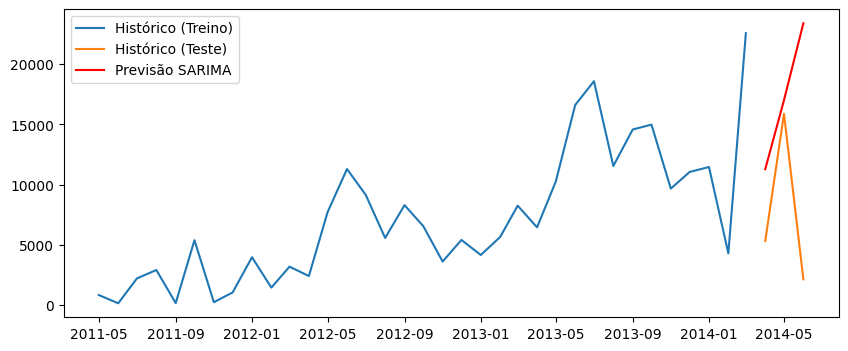

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty'], label='Histórico (Treino)')
plt.plot(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty'], label='Histórico (Teste)')
plt.plot(venda_mensal_test['ano_mes'], sarima_forecast_ts, label='Previsão SARIMA', color='red')
plt.legend()
plt.show()

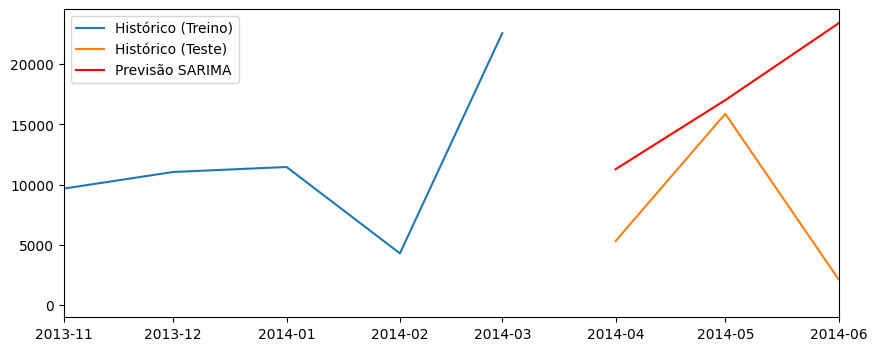

In [19]:
# Zoom na análise
plt.figure(figsize=(10, 4))
plt.plot(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty'], label='Histórico (Treino)')
plt.plot(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty'], label='Histórico (Teste)')
plt.plot(venda_mensal_test['ano_mes'], sarima_forecast_ts, label='Previsão SARIMA', color='red')
plt.legend()

plt.xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])

plt.show()

### Previsão usando statsforecast e AutoArima

O StatsForecast fornece o modelo AutoARIMA, que ajusta automaticamente os parâmetros de ARIMA/SARIMA (como p, d, q e os parâmetros sazonais) com base nos dados, simplificando o processo de configuração manual.

In [20]:
# Inicializando o StatsForecast object with AutoARIMA e modelo Naive
fcst = StatsForecast(
    models=[AutoARIMA(season_length=12), Naive()],
    freq='MS',
    n_jobs=-1,
)

# Performando a previsão no treino num h de 3 meses
Y_hat_df = fcst.forecast(
    df=venda_mensal_train,
    h=3,
    target_col='orderqty',
    time_col='ano_mes'
)


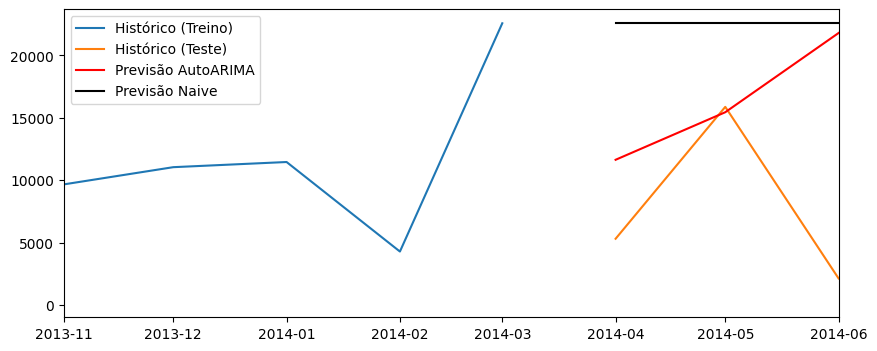

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty'], label='Histórico (Treino)')
plt.plot(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty'], label='Histórico (Teste)')
plt.plot(Y_hat_df['ano_mes'], Y_hat_df['AutoARIMA'], label='Previsão AutoARIMA', color='red')
plt.plot(Y_hat_df['ano_mes'], Y_hat_df['Naive'], label='Previsão Naive', color='black')
plt.legend()

# Limita a visualização no periodo que está no iloc
plt.xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])

plt.show()

In [22]:

# Junta os dados de previsão (Y_hat_df) com os dados reais de teste (venda_mensal_test) em uma única tabela (eval_df),
# usando as colunas unique_id (identificação do produto ou loja) e ano_mes (data mensal) como chave.

# compara diretamente as previsões (coluna AutoARIMA) com os valores reais (orderqty).
eval_df = Y_hat_df.merge(venda_mensal_test, on=['unique_id', 'ano_mes'])
eval_df

# Cálculo das métricas de erro
mae = mean_absolute_error(eval_df['orderqty'], eval_df['AutoARIMA'])
mse = mean_squared_error(eval_df['orderqty'], eval_df['AutoARIMA'])
rmse = mse ** 0.5
mape = (abs(eval_df['orderqty'] - eval_df['AutoARIMA']) / eval_df['orderqty']).mean() * 100

# Display metrics
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MAPE (%)": mape,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

MAE: 8811.30
MSE: 142434496.00
RMSE: 11934.59
MAPE (%): 348.50


- MAE (Mean Absolute Error):

Mede o erro médio absoluto entre os valores previstos e os reais.

Quanto menor, melhor. Representa o erro médio absoluto que você pode esperar nas previsões.

- MSE (Mean Squared Error):

Mede o erro médio ao quadrado, penalizando erros maiores.

Quanto menor, melhor. Sensível a erros extremos, ou seja, previsões muito distantes do valor real.

- RMSE (Root Mean Squared Error):

É a raiz quadrada do MSE.

Interpretação: Indica o tamanho médio do erro das previsões. Menores valores indicam melhores previsões.

- MAPE (Mean Absolute Percentage Error):

Mede o erro percentual médio entre os valores reais e previstos. É expresso em porcentagem.

Valores menores significam que as previsões estão mais próximas dos valores reais, considerando proporcionalidade.

**Análise dos resultados**
- MAE: 8811.30
O modelo tem um erro médio absoluto de aproximadamente 8.811 pedidos por mês.

- MSE: 142,434,496.00
O número alto indica que há grandes discrepâncias entre os valores previstos e reais em algumas observações.

- RMSE: 11,934.59
Em média, o erro das previsões é de quase 11.935 pedidos por mês.

- MAPE: 348.50%
O erro percentual médio é de 348,5%, o que é extremamente alto. Isso significa que, em média, as previsões estão mais de 3 vezes distantes dos valores reais.

Essas métricas mostram que o modelo está performando muito mal, ou seja, não deve ser usado para uma previsão de demanda.

## Questão 9

**Seria possível resolver este problema através de uma abordagem utilizando modelos de regressão? Se sim, qual demonstra melhor resultado? Justifique utilizando métricas de avaliação.**



### Previsão usando mlforecast e LinearRegression

O código abaixo utiliza a biblioteca StatsForecast para criar um modelo de previsão baseado em Machine Learning (Regressão Linear)

In [23]:
fcst = MLForecast(models=[LinearRegression(),], freq='MS', lags=[1,2,12])

fcst.fit(
    venda_mensal_train,
    fitted=True,
    prediction_intervals=PredictionIntervals(n_windows=4, h=3),
    target_col='orderqty',
    time_col='ano_mes',
)

# level = np.arange(0, 100, 2)
Y_hat_df = fcst.predict(3)

insample_df = fcst.forecast_fitted_values()

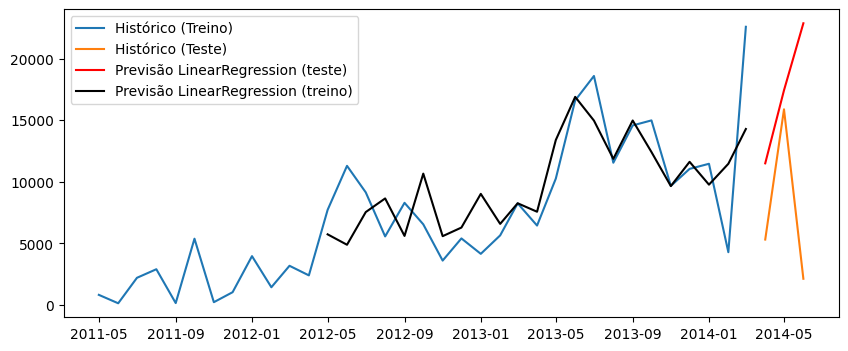

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty'], label='Histórico (Treino)')
plt.plot(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty'], label='Histórico (Teste)')
plt.plot(Y_hat_df['ano_mes'], Y_hat_df['LinearRegression'], label='Previsão LinearRegression (teste)', color='red')
plt.plot(insample_df['ano_mes'], insample_df['LinearRegression'], label='Previsão LinearRegression (treino)', color='black')
plt.legend()

# plt.xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])

plt.show()

In [25]:
eval_df = Y_hat_df.merge(venda_mensal_test, on=['unique_id', 'ano_mes'])

mae = mean_absolute_error(eval_df['orderqty'], eval_df['LinearRegression'])
mse = mean_squared_error(eval_df['orderqty'], eval_df['LinearRegression'])
rmse = mse ** 0.5
mape = (abs(eval_df['orderqty'] - eval_df['LinearRegression']) / eval_df['orderqty']).mean() * 100

metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MAPE (%)": mape,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

MAE: 9488.62
MSE: 156883664.00
RMSE: 12525.32
MAPE (%): 366.56


Essas métricas mostram que o modelo de Regressão Linear não está performando bem para este conjunto de dados.

O erro percentual (MAPE) e os valores absolutos de erro (MAE e RMSE) são muito altos. Isso pode indicar que o modelo não está capturando a complexidade ou possíveis padrões não lineares dos dados (como tendências ou sazonalidade).

## Questão 10

**Os novos centros de distribuição passaram a ser divididos em províncias nos EUA e em países no resto do mundo. Qual desses grupos apresentou mais crescimento em demanda nos três meses previstos no item 8?**

In [26]:
df = pd.read_csv("vendas.csv")

df['orderdate'] = pd.to_datetime(df['orderdate'])

df['ano_mes'] = df['orderdate'].dt.strftime('%Y-%m')

df['is_usa'] = df['country_name'] == 'United States'

df['ano_mes'] = df['orderdate'].dt.to_period('M')

df["total"] = df["orderqty"] * df["unitprice"]

df_usa = df[df['is_usa']].groupby('ano_mes')['orderqty'].sum().reset_index()
df_usa['ano_mes'] = df_usa['ano_mes'].dt.to_timestamp()

df_non_usa = df[~df['is_usa']].groupby('ano_mes')['orderqty'].sum().reset_index()
df_non_usa['ano_mes'] = df_non_usa['ano_mes'].dt.to_timestamp()

df_usa.index = ['total'] * len(df_usa.index)
df_usa = df_usa.reset_index()
df_usa.rename(columns={'index': 'unique_id'}, inplace=True)

df_non_usa.index = ['total'] * len(df_non_usa.index)
df_non_usa = df_non_usa.reset_index()
df_non_usa.rename(columns={'index': 'unique_id'}, inplace=True)

In [27]:
# TRAIN TEST
# Separa treino e teste (últimos 3 meses para teste)
non_usa_venda_mensal_train = df_non_usa.drop(index = df_non_usa.index[-3:])
non_usa_venda_mensal_test = df_non_usa.tail(3)

usa_venda_mensal_train = df_usa.drop(index = df_usa.index[-3:])
usa_venda_mensal_test = df_usa.tail(3)

In [28]:
# inicializa o StatsForecast com AutoARIMA e Naive
usa_fcst = StatsForecast(models=[AutoARIMA(season_length=12), Naive()], freq='MS', n_jobs=-1)
non_usa_fcst = StatsForecast(models=[AutoARIMA(season_length=12), Naive()], freq='MS', n_jobs=-1)


# Performando a previsão no treino
usa_Y_hat_df = usa_fcst.forecast(df=usa_venda_mensal_train, h=3, target_col='orderqty', time_col='ano_mes')
non_usa_Y_hat_df = non_usa_fcst.forecast(df=non_usa_venda_mensal_train, h=3, target_col='orderqty', time_col='ano_mes')

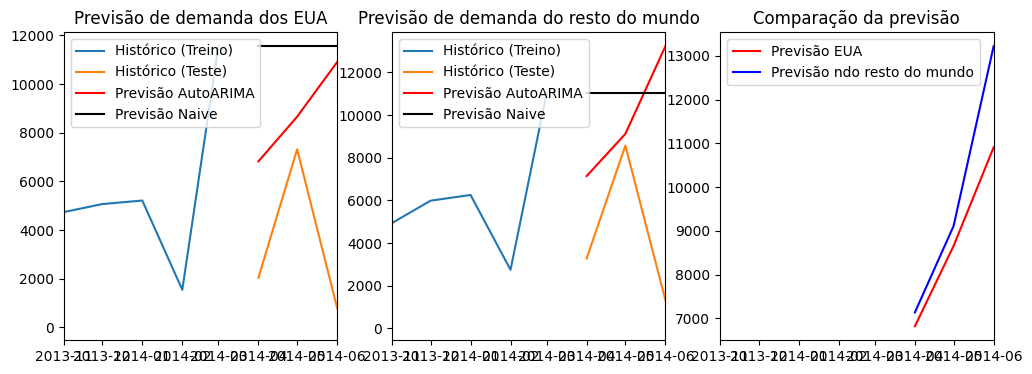

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

# Gráfico Estados Unidos
axes[0].plot(usa_venda_mensal_train['ano_mes'], usa_venda_mensal_train['orderqty'], label='Histórico (Treino)')
axes[0].plot(usa_venda_mensal_test['ano_mes'], usa_venda_mensal_test['orderqty'], label='Histórico (Teste)')
axes[0].plot(usa_Y_hat_df['ano_mes'], usa_Y_hat_df['AutoARIMA'], label='Previsão AutoARIMA', color='red')
axes[0].plot(usa_Y_hat_df['ano_mes'], usa_Y_hat_df['Naive'], label='Previsão Naive', color='black')
axes[0].legend()
axes[0].set_xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])
axes[0].set_title("Previsão de demanda dos EUA")

# Gráfico do resto do mundo
axes[1].plot(non_usa_venda_mensal_train['ano_mes'], non_usa_venda_mensal_train['orderqty'], label='Histórico (Treino)')
axes[1].plot(non_usa_venda_mensal_test['ano_mes'], non_usa_venda_mensal_test['orderqty'], label='Histórico (Teste)')
axes[1].plot(non_usa_Y_hat_df['ano_mes'], non_usa_Y_hat_df['AutoARIMA'], label='Previsão AutoARIMA', color='red')
axes[1].plot(non_usa_Y_hat_df['ano_mes'], non_usa_Y_hat_df['Naive'], label='Previsão Naive', color='black')
axes[1].legend()
axes[1].set_xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])
axes[1].set_title("Previsão de demanda do resto do mundo")

# Gráfico de comparação
axes[2].plot(usa_Y_hat_df['ano_mes'], usa_Y_hat_df['AutoARIMA'], label='Previsão EUA', color='red')
axes[2].plot(non_usa_Y_hat_df['ano_mes'], non_usa_Y_hat_df['AutoARIMA'], label='Previsão ndo resto do mundo', color='blue')
axes[2].legend()
axes[2].set_xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])
axes[2].set_title("Comparação da previsão")


plt.show()

Pelo gráficos, podemos perceber que a demanda do resto do mundo apresenta maior crescimento que a demanda estadunidense.

## Questão 11

**Um novo fornecedor de luvas, que agora engloba toda a produção mundial, precisa ter uma estimativa de quantos zíperes precisa pedir para os próximos 3 meses. Levando em consideração que são necessários 2 zíperes por par, quantos seriam necessários?**

In [30]:
df = pd.read_csv("vendas.csv")

df['orderdate'] = pd.to_datetime(df['orderdate'])

df['ano_mes'] = df['orderdate'].dt.strftime('%Y-%m')

# Seleciona apenas as linhas que tem "Gloves" = Luvas no product_name
df = df[df['product_name'].str.contains('Gloves', case=False, na=False)]

df['ano_mes'] = df['orderdate'].dt.to_period('M')

df["total"] = df["orderqty"] * df["unitprice"]

df = df.groupby('ano_mes')['orderqty'].sum().reset_index()
df['ano_mes'] = df['ano_mes'].dt.to_timestamp()

df.index = ['total'] * len(df.index)
df = df.reset_index()
df.rename(columns={'index': 'unique_id'}, inplace=True)

In [31]:
# TRAIN TEST SPLIT
# Separar treino e teste (últimos 3 meses para teste)
venda_mensal_train = df.drop(index = df.index[-3:])
venda_mensal_test = df.tail(3)

In [32]:
# Inicializa o StatsForecast com AutoARIMA e Naive
fcst = StatsForecast(
    models=[AutoARIMA(season_length=12), Naive()],
    freq='MS',
    n_jobs=-1,
)

# Performa a previsão no treino
Y_hat_df = fcst.forecast(
    df=venda_mensal_train,
    h=3,  # Forecast horizon
    target_col='orderqty',
    time_col='ano_mes'
)

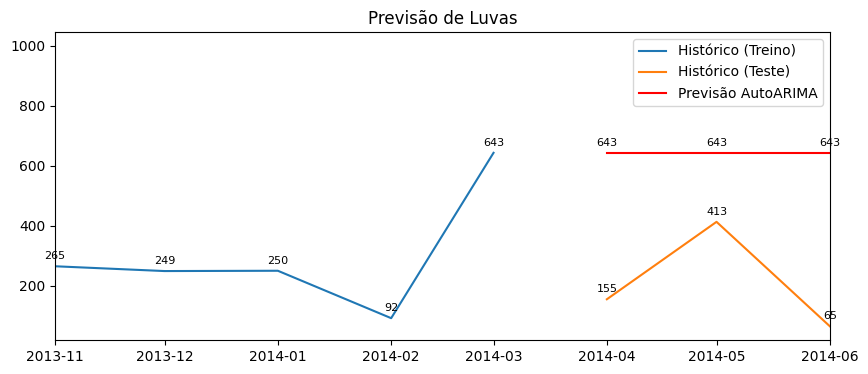

In [33]:
plt.figure(figsize=(10, 4))

# Plotando as linhas
plt.plot(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty'], label='Histórico (Treino)')
plt.plot(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty'], label='Histórico (Teste)')
plt.plot(Y_hat_df['ano_mes'], Y_hat_df['AutoARIMA'], label='Previsão AutoARIMA', color='red')
# plt.plot(Y_hat_df['ano_mes'], Y_hat_df['Naive'], label='Previsão Naive', color='black')

# Adicionando os valores em cada ponto das linhas
for x, y in zip(venda_mensal_train['ano_mes'], venda_mensal_train['orderqty']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

for x, y in zip(venda_mensal_test['ano_mes'], venda_mensal_test['orderqty']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

for x, y in zip(Y_hat_df['ano_mes'], Y_hat_df['AutoARIMA']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Configurações adicionais do gráfico
plt.legend()
plt.title('Previsão de Luvas')
plt.xlim(venda_mensal_train['ano_mes'].iloc[-5], venda_mensal_test['ano_mes'].iloc[-1])

plt.show()

Estimativa de Demanda de Zíperes para Produção de Luvas

Com base na previsão de vendas para os próximos três meses, a demanda estimada para produção de pares de luvas é de 643 pares por mês. Considerando que cada par de luvas requer 2 zíperes, a quantidade total de zíperes necessários para atender à demanda projetada é de:

643 x 2 = 1286 zíperes por mês.

SAbendo o valor pra um mês, podemos concluir que a demanda para os próximos 3 meses é de:

1286 * 3 = 3858

Conclusão: O fornecedor deve solicitar 3.858 zíperes para atender à produção global de luvas prevista para os próximos três meses.

